# 필요 모듈 호출

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드

In [2]:
os.listdir("/Users/yeomyungro/Documents/github/recommendation/data/ml-latest-small/")

['links.csv', 'tags.csv', 'ratings.csv', 'README.txt', 'movies.csv']

In [4]:
path = '/Users/yeomyungro/Documents/github/recommendation/'

In [6]:
rating = pd.read_csv(path+"data/ml-latest-small/ratings.csv", encoding="utf-8")
tag = pd.read_csv(path+"data/ml-latest-small/tags.csv", encoding="utf-8")
movie = pd.read_csv(path+"data/ml-latest-small/movies.csv", encoding="utf-8")

In [7]:
rating.shape

(100836, 4)

In [8]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
tag.shape

(3683, 4)

In [10]:
tag.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [11]:
movie.shape

(9742, 3)

In [12]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# EDA

In [12]:
len(rating["userId"].unique())

610

In [13]:
len(tag["tag"].unique())

1589

In [14]:
len(movie["movieId"].unique())

9742

In [16]:
rating["rating"].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [18]:
rating["rating"].value_counts().sort_index()

0.5     1370
1.0     2811
1.5     1791
2.0     7551
2.5     5550
3.0    20047
3.5    13136
4.0    26818
4.5     8551
5.0    13211
Name: rating, dtype: int64

In [24]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [28]:
rating.isnull().sum(axis=0)

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [142]:
def plot_setting(func):
    def wrapper(**kwargs):
        plt.figure(figsize=(20, 10))
        func(**kwargs)
        plt.show()
    return wrapper

In [151]:
@plot_setting
def draw_hist(data, column, kde=True):
    return sns.histplot(data=data, x=column, kde=kde)

@plot_setting
def draw_count(data, column):
    return sns.countplot(data=data, x=column)

@plot_setting
def draw_scatter(data, x, y):
    return sns.relplot(data=data, x=x, y=y)

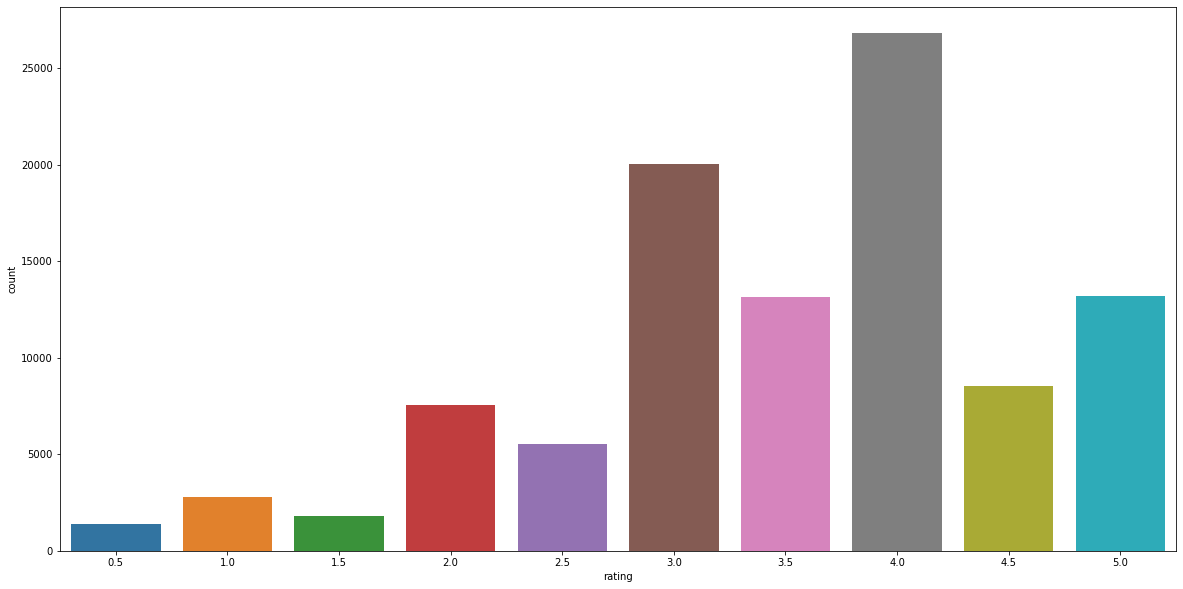

In [130]:
draw_count(data=rating, column="rating")

In [35]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [45]:
rating_by_user = rating.groupby("userId").mean()["rating"]
rating_by_user.head()

userId
1    4.366379
2    3.948276
3    2.435897
4    3.555556
5    3.636364
Name: rating, dtype: float64

In [50]:
temp = pd.DataFrame({"count":rating.groupby(["userId", "rating"]).size()}).reset_index()
temp.head()

,userId,rating,count
0,1,1.0,1
1,1,2.0,5
2,1,3.0,26
3,1,4.0,76
4,1,5.0,124


In [58]:
user_info = rating.groupby("userId")["movieId"].count()
user_info.head()

userId
1    232
2     29
3     39
4    216
5     44
Name: movieId, dtype: int64

In [62]:
user_info.describe()

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: movieId, dtype: float64

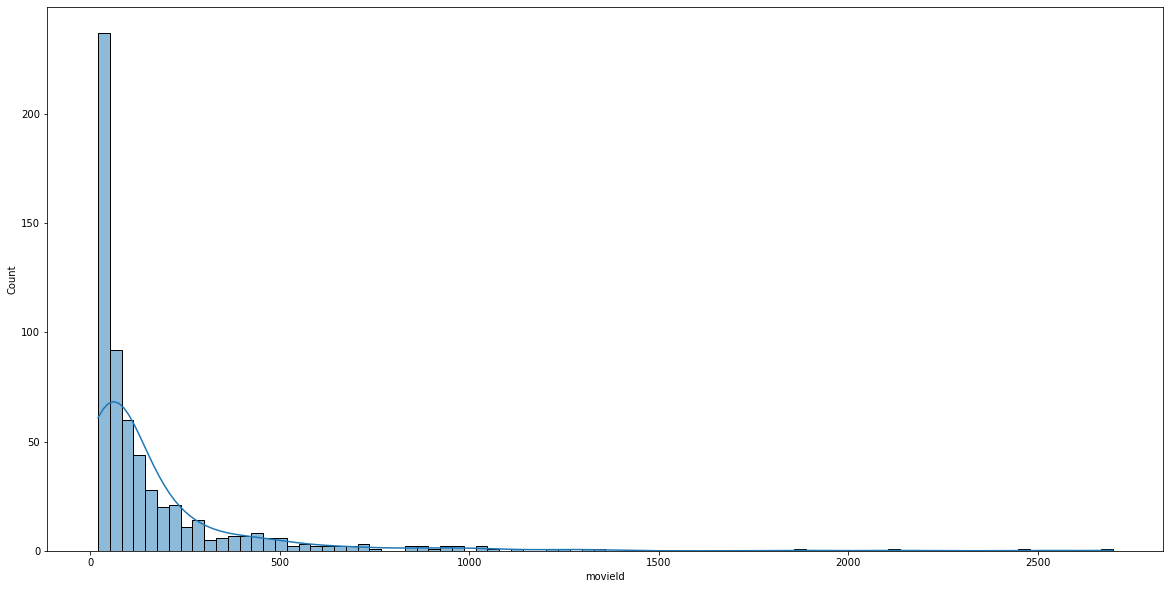

In [61]:
plt.figure(figsize=(20, 10))
sns.histplot(user_info, kde=True)
plt.show()

In [63]:
stats = pd.DataFrame({
    "movie_count":rating.groupby("userId")["movieId"].count(),
    "rating_avg":rating.groupby("userId")["rating"].mean(),
    "rating_std":rating.groupby("userId")["rating"].std()
})
stats.head()

,movie_count,rating_avg,rating_std
userId,,,
1,232,4.366379,0.800048
2,29,3.948276,0.805615
3,39,2.435897,2.090642
4,216,3.555556,1.314204
5,44,3.636364,0.990441


<Figure size 1440x720 with 0 Axes>

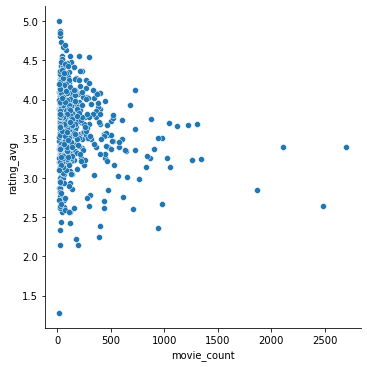

In [65]:
plt.figure(figsize=(20, 10))
sns.relplot(data=stats, x="movie_count", y="rating_avg")
plt.show()

In [66]:
movie_stats = pd.DataFrame({
    "user_count":rating.groupby("movieId")["userId"].count(),
    "rating_avg":rating.groupby("movieId")["rating"].mean(),
    "rating_std":rating.groupby("movieId")["rating"].std()
})
movie_stats.head()

,user_count,rating_avg,rating_std
movieId,,,
1,215,3.920930,0.834859
2,110,3.431818,0.881713
3,52,3.259615,1.054823
4,7,2.357143,0.852168
5,49,3.071429,0.907148


In [74]:
movie_stats.describe()

,user_count,rating_avg,rating_std
count,9724.000000,9724.000000,6278.000000
mean,10.369807,3.262448,0.839030
std,22.401005,0.869874,0.391432
min,1.000000,0.500000,0.000000
25%,1.000000,2.800000,0.629153
50%,3.000000,3.416667,0.837921
75%,9.000000,3.911765,1.051337
max,329.000000,5.000000,3.181981


<Figure size 1440x720 with 0 Axes>

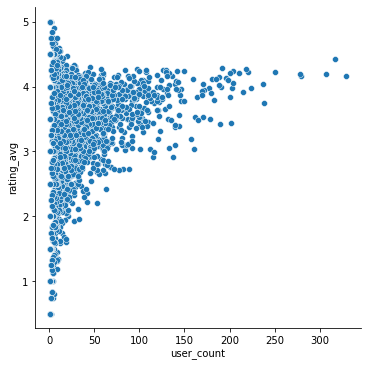

In [67]:
plt.figure(figsize=(20, 10))
sns.relplot(data=movie_stats, x="user_count", y="rating_avg", kind="scatter")
plt.show()

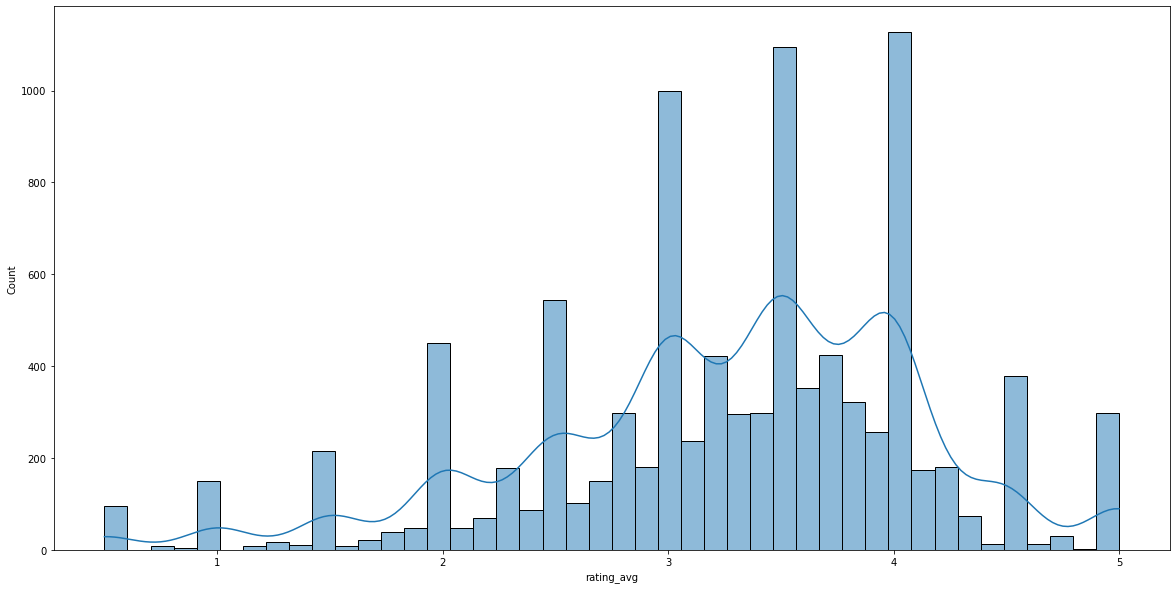

In [148]:
draw_hist(data=movie_stats, column="rating_avg", kde=True)

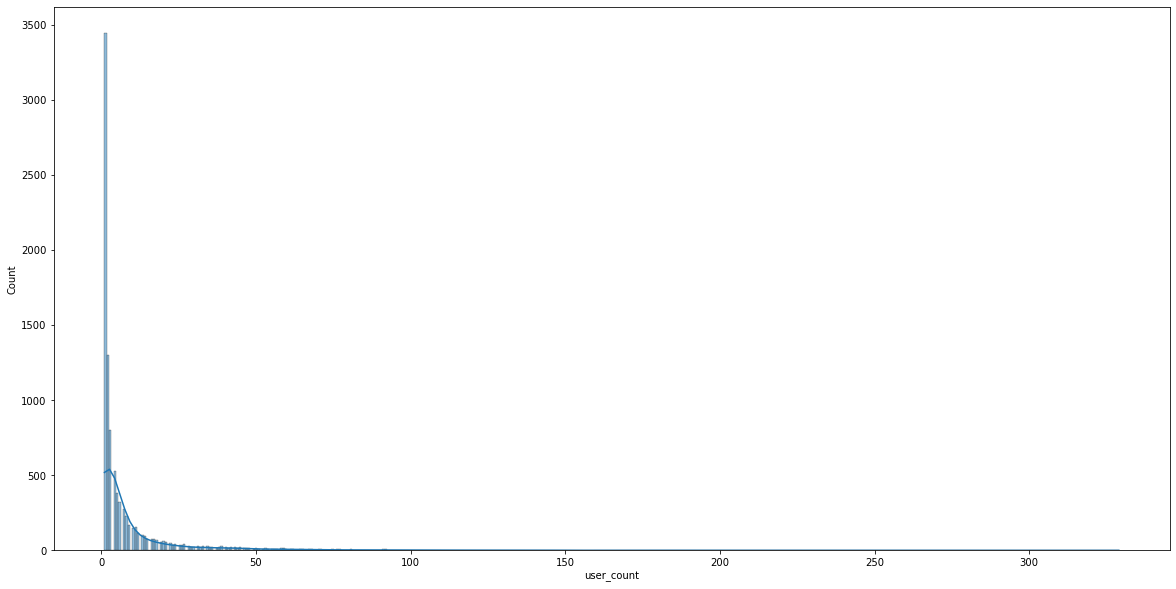

In [149]:
draw_hist(data=movie_stats, column="user_count")

In [79]:
movie_stats.shape

(9724, 3)

In [77]:
movie_stats[movie_stats["user_count"]==1].shape[0]

(3446, 3)

In [78]:
movie_stats[movie_stats["user_count"]<3].shape[0]

4744

In [97]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [98]:
temp = pd.DataFrame({"rating_count":rating.groupby("movieId")["userId"].count()}).reset_index()
temp.head()

,movieId,rating_count
0,1,215
1,2,110
2,3,52
3,4,7
4,5,49


In [99]:
movie_info = pd.merge(temp, movie, 
                      left_on="movieId",
                      right_on="movieId",
                      how="inner")
movie_info.head()

,movieId,rating_count,title,genres
0,1,215,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,110,Jumanji (1995),Adventure|Children|Fantasy
2,3,52,Grumpier Old Men (1995),Comedy|Romance
3,4,7,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,49,Father of the Bride Part II (1995),Comedy


In [100]:
movie_info.sort_values("rating_count", ascending=False)

,movieId,rating_count,title,genres
314,356,329,Forrest Gump (1994),Comedy|Drama|Romance|War
277,318,317,"Shawshank Redemption, The (1994)",Crime|Drama
257,296,307,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
510,593,279,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
1938,2571,278,"Matrix, The (1999)",Action|Sci-Fi|Thriller
...,...,...,...,...
3053,4093,1,Cop (1988),Thriller
3049,4089,1,Born in East L.A. (1987),Comedy
6687,58351,1,City of Men (Cidade dos Homens) (2007),Drama
3045,4083,1,Best Seller (1987),Thriller


In [101]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


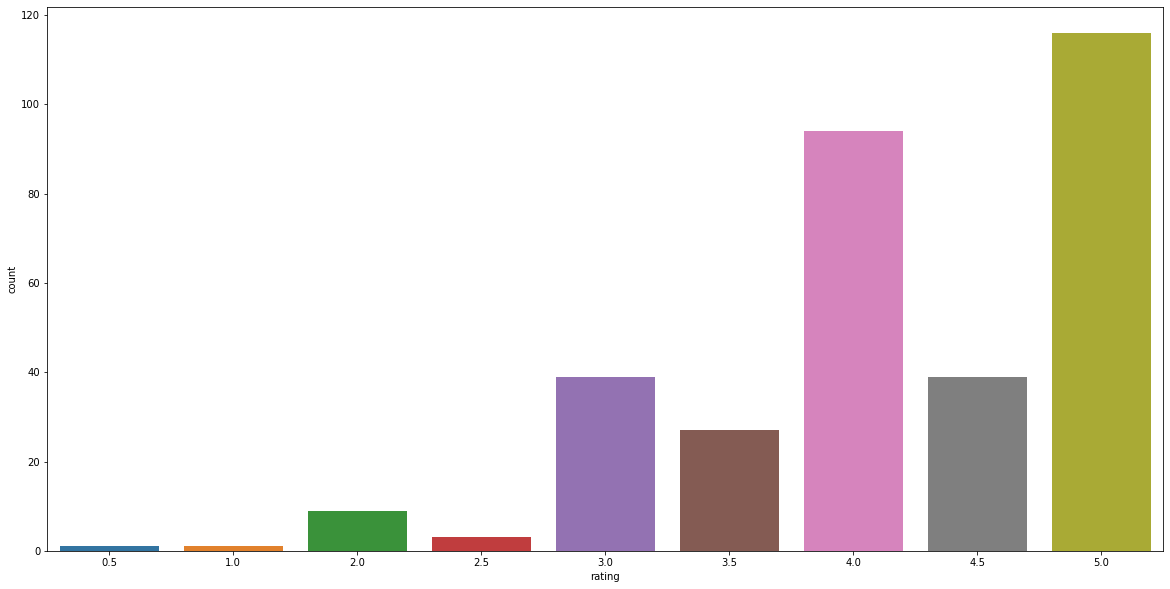

In [152]:
draw_count(data=rating[rating["movieId"]==356], column="rating")

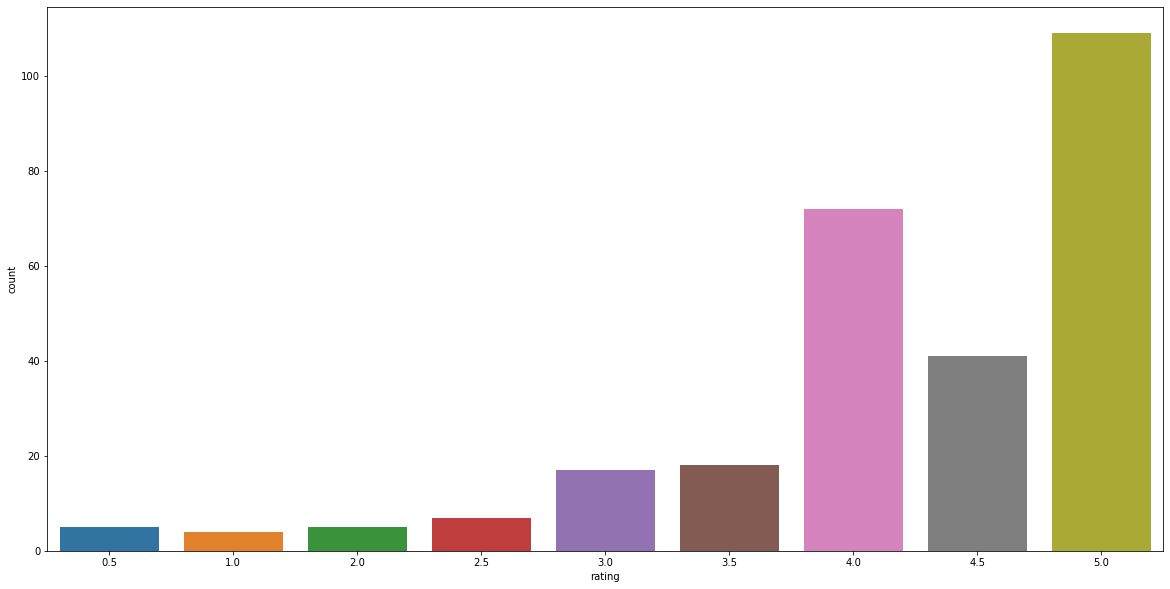

In [153]:
draw_count(data=rating[rating["movieId"]==2571], column="rating")

In [4]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
tag.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [6]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Genre

In [12]:
all_genres = [x.split('|') for x in movie["genres"].values]

In [20]:
len(all_genres)

9742

In [21]:
import itertools
genres = list(set(list(itertools.chain(*all_genres))))

In [22]:
len(genres)

20

In [23]:
genres

['Crime',
 'IMAX',
 'Musical',
 'Adventure',
 'Romance',
 'Fantasy',
 '(no genres listed)',
 'Thriller',
 'Western',
 'Action',
 'Drama',
 'Horror',
 'Mystery',
 'Documentary',
 'Animation',
 'Sci-Fi',
 'War',
 'Children',
 'Comedy',
 'Film-Noir']

In [25]:
genre = pd.DataFrame(columns=genres, index=movie.index)
genre.head()

,Crime,IMAX,Musical,Adventure,Romance,Fantasy,(no genres listed),Thriller,Western,Action,Drama,Horror,Mystery,Documentary,Animation,Sci-Fi,War,Children,Comedy,Film-Noir
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
ct = 0
for i, row in genre.iterrows():
    movie_id = row.name
    list_of_genres = movie.loc[movie_id]['genres'].split("|")
    
    genre.loc[movie_id][list_of_genres] = 1

In [36]:
genre = genre.fillna(0)
genre["num_genres"] = genre.sum(axis=1)
print(genre.shape)
genre.head()

(9742, 21)


,Crime,IMAX,Musical,Adventure,Romance,Fantasy,(no genres listed),Thriller,Western,Action,...,Horror,Mystery,Documentary,Animation,Sci-Fi,War,Children,Comedy,Film-Noir,num_genres
0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,1,1,0,5
1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [37]:
genre = movie["genres"].str.get_dummies(sep="|")
genre.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
movie_all = pd.concat([movie, genre], axis=1)
movie_all.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
movie_all.drop("genres", axis=1, inplace=True)

In [42]:
movie_all.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [48]:
movieId_list = movie_all["title"][movie_all["Animation"]==1]

In [51]:
movieId_list

0                                        Toy Story (1995)
12                                           Balto (1995)
44                                      Pocahontas (1995)
205                                 Goofy Movie, A (1995)
272                             Swan Princess, The (1994)
                              ...                        
9733    anohana: The Flower We Saw That Day - The Movi...
9735              Love Live! The School Idol Movie (2015)
9737            Black Butler: Book of the Atlantic (2017)
9738                         No Game No Life: Zero (2017)
9740                  Bungo Stray Dogs: Dead Apple (2018)
Name: title, Length: 611, dtype: object

In [52]:
animation = rating[rating["movieId"].isin(movieId_list.index)]
animation.head()

,userId,movieId,rating,timestamp
28,1,527,5.0,964984002
35,1,596,5.0,964982838
39,1,673,3.0,964981775
42,1,780,3.0,964984086
98,1,1517,5.0,964981107


In [53]:
len(animation["userId"].unique())

525

In [54]:
animation.describe()

,userId,movieId,rating,timestamp
count,3633.000000,3633.000000,3633.000000,3.633000e+03
mean,325.822736,3069.610239,3.479631,1.168779e+09
std,182.304340,2619.201206,1.047862,2.022052e+08
min,1.000000,12.000000,0.500000,8.297609e+08
25%,177.000000,786.000000,3.000000,9.952360e+08
50%,325.000000,2115.000000,3.500000,1.155284e+09
75%,474.000000,4874.000000,4.000000,1.333233e+09
max,610.000000,8985.000000,5.000000,1.537158e+09


In [58]:
animation.groupby("userId")["rating"].mean()

userId
1      4.400000
3      2.500000
4      2.200000
5      4.333333
6      3.666667
         ...   
606    3.656863
607    4.333333
608    3.092105
609    3.000000
610    3.795455
Name: rating, Length: 525, dtype: float64

In [59]:
genre.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
genre.corr()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
(no genres listed),1.000000,-0.028442,-0.022840,-0.015309,-0.016005,-0.046878,-0.022171,-0.012871,-0.053277,-0.017447,-0.005618,-0.019769,-0.007599,-0.011151,-0.014794,-0.026195,-0.019792,-0.029073,-0.011956,-0.007816
Action,-0.028442,1.000000,0.291949,0.029659,-0.049652,-0.148968,0.154471,-0.099463,-0.152964,0.059931,-0.031649,-0.035443,0.131864,-0.083331,-0.028515,-0.146670,0.233475,0.199042,0.076289,0.021600
Adventure,-0.022840,0.291949,1.000000,0.211472,0.273931,-0.055215,-0.085988,-0.075111,-0.156327,0.262511,-0.030140,-0.098423,0.143982,-0.005544,-0.048427,-0.072584,0.181797,-0.035942,0.010195,0.036136
Animation,-0.015309,0.029659,0.211472,1.000000,0.437376,0.029079,-0.069847,-0.050144,-0.160504,0.196895,-0.015555,-0.062464,0.080744,0.111804,-0.030477,-0.061882,0.064093,-0.107822,-0.036990,-0.024378
Children,-0.016005,-0.049652,0.273931,0.437376,1.000000,0.088701,-0.086442,-0.056859,-0.160742,0.234117,-0.025673,-0.083569,0.062011,0.137072,-0.036449,-0.070189,-0.011910,-0.127716,-0.048341,-0.016890
Comedy,-0.046878,-0.148968,-0.055215,0.029079,0.088701,1.000000,-0.075282,-0.131657,-0.283472,-0.005708,-0.070710,-0.133382,-0.056627,0.045466,-0.127209,0.153088,-0.132400,-0.286289,-0.095919,-0.039622
Crime,-0.022171,0.154471,-0.085988,-0.069847,-0.086442,-0.075282,1.000000,-0.073955,0.063005,-0.086254,0.137141,-0.063805,-0.020892,-0.056850,0.124138,-0.097444,-0.095166,0.265196,-0.059585,-0.022997
Documentary,-0.012871,-0.099463,-0.075111,-0.050144,-0.056859,-0.131657,-0.073955,1.000000,-0.173925,-0.060473,-0.020645,-0.069364,0.003381,-0.005664,-0.050168,-0.093597,-0.072736,-0.104346,-0.013378,-0.024915
Drama,-0.053277,-0.152964,-0.156327,-0.160504,-0.160742,-0.283472,0.063005,-0.173925,1.000000,-0.106337,0.024256,-0.187391,-0.063293,-0.038022,0.027635,0.122454,-0.158325,-0.008267,0.135067,-0.025060
Fantasy,-0.017447,0.059931,0.262511,0.196895,0.234117,-0.005708,-0.086254,-0.060473,-0.106337,1.000000,-0.023962,0.012336,0.102962,0.050524,0.014768,-0.000635,0.046094,-0.057807,-0.043959,-0.021441


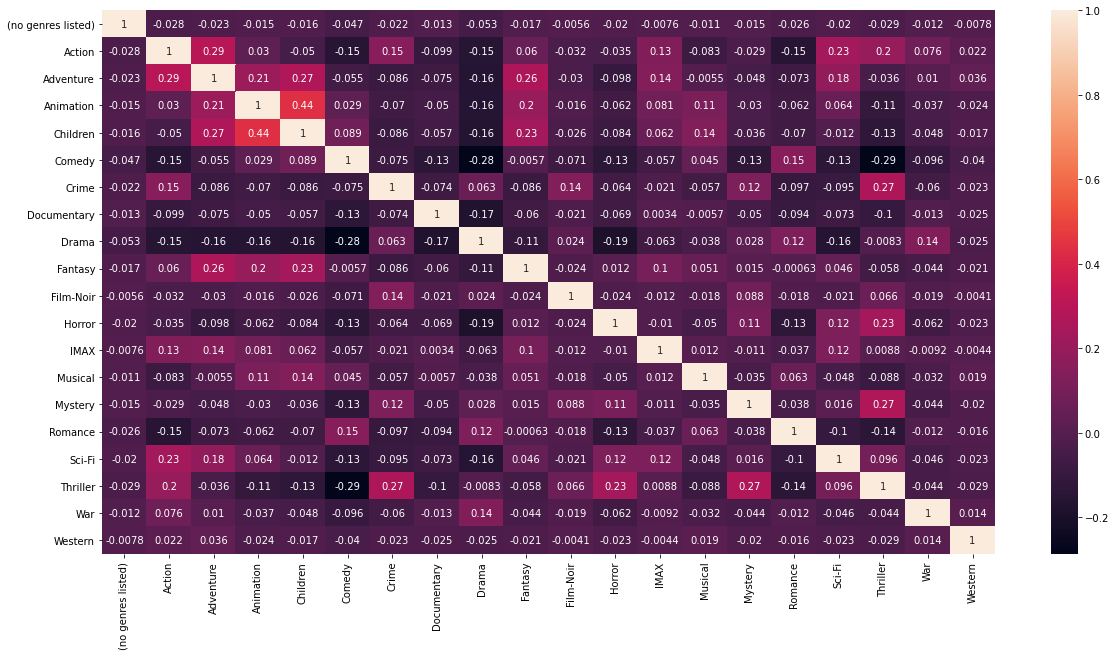

In [63]:
plt.figure(figsize=(20, 10))
sns.heatmap(genre.corr(), annot=True)
plt.show()

In [65]:
movie_all.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
title = movie_all.copy()
title.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
title["year"] = title["title"].str.extract("(\d\d\d\d)")
title[["movieId", "title", "year"]].head()

,movieId,title,year
0,1,Toy Story (1995),1995
1,2,Jumanji (1995),1995
2,3,Grumpier Old Men (1995),1995
3,4,Waiting to Exhale (1995),1995
4,5,Father of the Bride Part II (1995),1995


In [77]:
title.isnull().sum()

movieId                0
title                  0
(no genres listed)     0
Action                 0
Adventure              0
Animation              0
Children               0
Comedy                 0
Crime                  0
Documentary            0
Drama                  0
Fantasy                0
Film-Noir              0
Horror                 0
IMAX                   0
Musical                0
Mystery                0
Romance                0
Sci-Fi                 0
Thriller               0
War                    0
Western                0
year                  12
dtype: int64

In [80]:
title[title["year"].isnull()]

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
6059,40697,Babylon 5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,NaN
9031,140956,Ready Player One,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,NaN
9091,143410,Hyena Road,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
9138,147250,The Adventures of Sherlock Holmes and Doctor W...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
9179,149334,Nocturnal Animals,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,NaN
9259,156605,Paterson,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
9367,162414,Moonlight,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
9448,167570,The OA,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
9514,171495,Cosmos,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
9515,171631,Maria Bamford: Old Baby,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [87]:
year = pd.DataFrame({"movie_cnt":title.groupby("year")["movieId"].nunique()}).reset_index()
year["year"] = year["year"].astype(int)

In [93]:
year.head()

,year,movie_cnt
0,1000,1
1,1138,1
2,1408,1
3,1492,1
4,1600,1


In [95]:
year.sort_values("movie_cnt", ascending=False)

,year,movie_cnt
96,2002,310
100,2006,296
95,2001,295
94,2000,290
101,2007,283
...,...,...
10,1915,1
12,1917,1
13,1919,1
15,1921,1


In [96]:
year.describe()

,year,movie_cnt
count,117.000000,117.000000
mean,1946.735043,83.162393
std,173.150791,100.749173
min,1000.000000,1.000000
25%,1935.000000,9.000000
50%,1964.000000,36.000000
75%,1993.000000,144.000000
max,3000.000000,310.000000


<Figure size 1440x720 with 0 Axes>

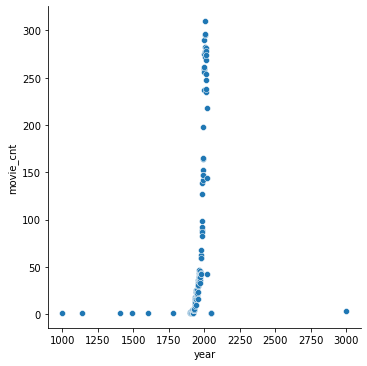

In [97]:
plt.figure(figsize=(20,10))
sns.relplot(data=year, x="year", y="movie_cnt")
plt.show()

<Figure size 1440x720 with 0 Axes>

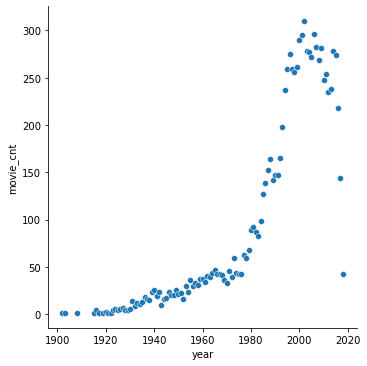

In [100]:
plt.figure(figsize=(20,10))
sns.relplot(data=year[(year["year"]> 1900)&(year["year"]< 2020)], x="year", y="movie_cnt")
plt.show()

<Figure size 1440x720 with 0 Axes>

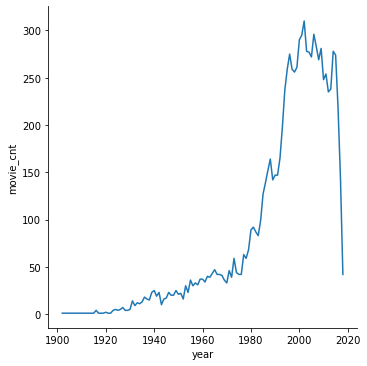

In [101]:
plt.figure(figsize=(20,10))
sns.relplot(data=year[(year["year"]> 1900)&(year["year"]< 2020)], 
            x="year", y="movie_cnt", kind="line")
plt.show()